# Girsanov formula and importance sampling

Let us consider the following SDE with constant diffusion coefficient and deterministic initial condition:

$$
\mathrm{d} X_t = b(X_t) \, \mathrm{d} t + \sigma \, \mathrm{d} W_t, \qquad X_0 = x_0.
$$

The update formula of the Euler-Maruyama scheme for this equation is the following:

$$
X^{\Delta t}_{n+1} = X^{\Delta t}_n + b(X^{\Delta t}_n) \, \Delta t + \sigma \, \Delta W_n, \qquad X^{\Delta t}_0 = x_0, \qquad n = 0, \dotsc, N-1.
$$

This update formula defines a discrete-time stochastic process very similar to one we examined a few weeks ago, when we calculated the probability of ruin of a gambler by importance sampling.

Remember, in particular, that we derived an explicit expression for the PDF of $\{X^{\Delta t}_n\}_{n=1}^{N}$, viewed as a random variable in $\mathbb R^N$:

$$
f_X^N(x_1, \dotsc, x_N) =
\left|\frac{1}{\sqrt{2\pi\sigma^2\Delta t}}\right|^N \, \exp \left(-\frac{1}{2\sigma^2\Delta t} \sum_{k=0}^{N -1} \left|x_{k+1} - x_{k} - b(x_k) \Delta t \right|^2 \right).
$$

Let us now denote by $Y_t$ the exact solution to the equation without drift, i.e. with $b(\cdot) = 0$, by $Y^{\Delta t} = \{Y^{\Delta t}_n\}_{n=1}^{N}$ its Euler-Maruyama approximation, and by $f_{Y}^N$ the PDF of $Y^{\Delta t}$. A simple calculation shows the ratio of the densities, called the *likelihood ratio*, is given by:

$$
M_N(x_1, \dotsc, x_N) := \frac{f_Y^N(x_1, \dotsc, x_N)}{f_X^N(x_1, \dotsc, x_N)} = \exp \left(- \frac{1}{\sigma^2} \sum_{k=0}^{N -1} \left( b(x_k) \, (x_{k+1} - x_{k}) - \frac{1}{2} |b(x_k)|^2 \Delta t \right) \right).
$$

Since the right-hand side is strictly positive, we say in measure-theoretic terms that $f_Y^N$ (or, to be more precise, the measure associated to it) is *absolutely continuous* with respect to $f_X^N$. Since the reciprocal of the ratio is also positive, $f_X^N$ is also absolutely continuous with respect to $f_Y^N$: we say that the two measures are *equivalent*.

This implies in particular that we can use $f_X^N$ to compute expectations with respect to $f_Y^N$, and vice versa:

$$
\mathbb{E}_{Y^{\Delta t} \sim f_Y^N} [g(Y^{\Delta t})] = \mathbb{E}_{X^{\Delta t} \sim f_X^N} [M_N(X^{\Delta t}) \, g(X^{\Delta t})]. \tag{1}
$$

Here, $X^{\Delta t}$ and $Y^{\Delta t}$ are short notations for $(X^{\Delta t}_1, \dotsc, X^{\Delta t}_N)$ and $(Y^{\Delta t}_1, \dotsc, Y^{\Delta t}_N)$, respectively.

Now observe that if $X^{\Delta t}$ is obtained from the Euler-Maruyama scheme above, then we have

$$
M_N(X^{\Delta t}) = \exp \left(- \frac{1}{\sigma^2} \sum_{k=0}^{N -1} \left( \sigma \,b(X^{\Delta t}_k) \, \Delta W_k + \frac{1}{2} |b(X^{\Delta t}_k)|^2 \Delta t \right) \right).
$$

Denoting by $\hat X^{\Delta t} = \{\hat X^{\Delta t}\}_{t \in [0, 1]}$ the piecewise constant continuous-time interpolation of $\{X^{\Delta t}_n\}_{n=0}^N$, we can rewrite the previous equation as

$$
M_N(X^{\Delta t}) = \exp \left( - \frac{1}{\sigma} \int_0^T \,b(\hat X^{\Delta t}_t) \, \mathrm{d} W_t - \frac{1}{2 \sigma^2} \int_0^T |b(\hat X^{\Delta t}_t)|^2 \mathrm{d} t \right). \tag{2}
$$

The Girsanov theorem shows that some of these considerations can be extended to the continuous-time processes $X_t$ (with drift $b$) and $Y_t$ (without drift). Roughly speaking, the theorem states that we can pass to the limit in equation $(1)$, in the sense that

$$
\mathbb{E} [g(Y_t)] = \mathbb{E} [M(X_t) \, g(X_t)],
$$

where $M(t)$ admits the following expression

$$
M(X_t) = \exp \left( - \frac{1}{\sigma} \int_0^T \,b(X_t) \, \mathrm{d} W_t - \frac{1}{2 \sigma^2} \int_0^T |b(X_t)|^2 \mathrm{d} t \right),
$$

which is not surprising in view of $(2)$. Note that, in this equation, $W_t$ is the driving Brownian motion of the equation for $X_t$; it might be useful to see $W_t$ as a function of $X_t$. Note also that the laws of $X_t$ and $Y_t$ are measures over an infinite-dimensional space, so it does not make sense to consider their density with respect to a Lebesgue measure and to define $M(X_t)$ as a ratio, which is why Girsanov's theorem is useful.

Below we employ this result to estimate the probability that $Y_t = x_0 + \sigma W_t$ exceeds a certain threshold $K$ for some $t \in [0, T]$. This is the continuous counterpart of the gambler's ruin. By the [reflection principle](https://en.wikipedia.org/wiki/Reflection_principle_(Wiener_process)), this probability equals

$$
P := \mathbb{P} \left[\sup_{0 \leq t \leq T} Y_t \geq K \right]
  = 2 \mathbb{P} \left[ Y_T \geq K \right]
  = 2\left(1 -  \Phi\left(\frac{K-x_0}{\sigma \sqrt{T}}\right)\right),
$$

where $\Phi$ is the Gaussian CDF. For simplicity, we take $x_0 = 0$ i $T = 1$.


In [2]:
# +
# Copyright (c) 2020 Urbain Vaes. All rights reserved.
#
# This work is licensed under the terms of the MIT license.
# For a copy, see <https://opensource.org/licenses/MIT>.

import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(13, 8))
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('lines', markersize=12)
matplotlib.rc('figure.subplot', hspace=.1)
matplotlib.rc('animation', html='html5')
# -


Exact value of the probability: 0.002700
95% confidence interval for P: [0.000450, 0.001750]
95% confidence interval for P: [0.001578, 0.001678]
95% confidence interval for P: [0.001441, 0.003359]
95% confidence interval for P: [0.002187, 0.002345]
95% confidence interval for P: [0.001764, 0.003836]
95% confidence interval for P: [0.002442, 0.002647]


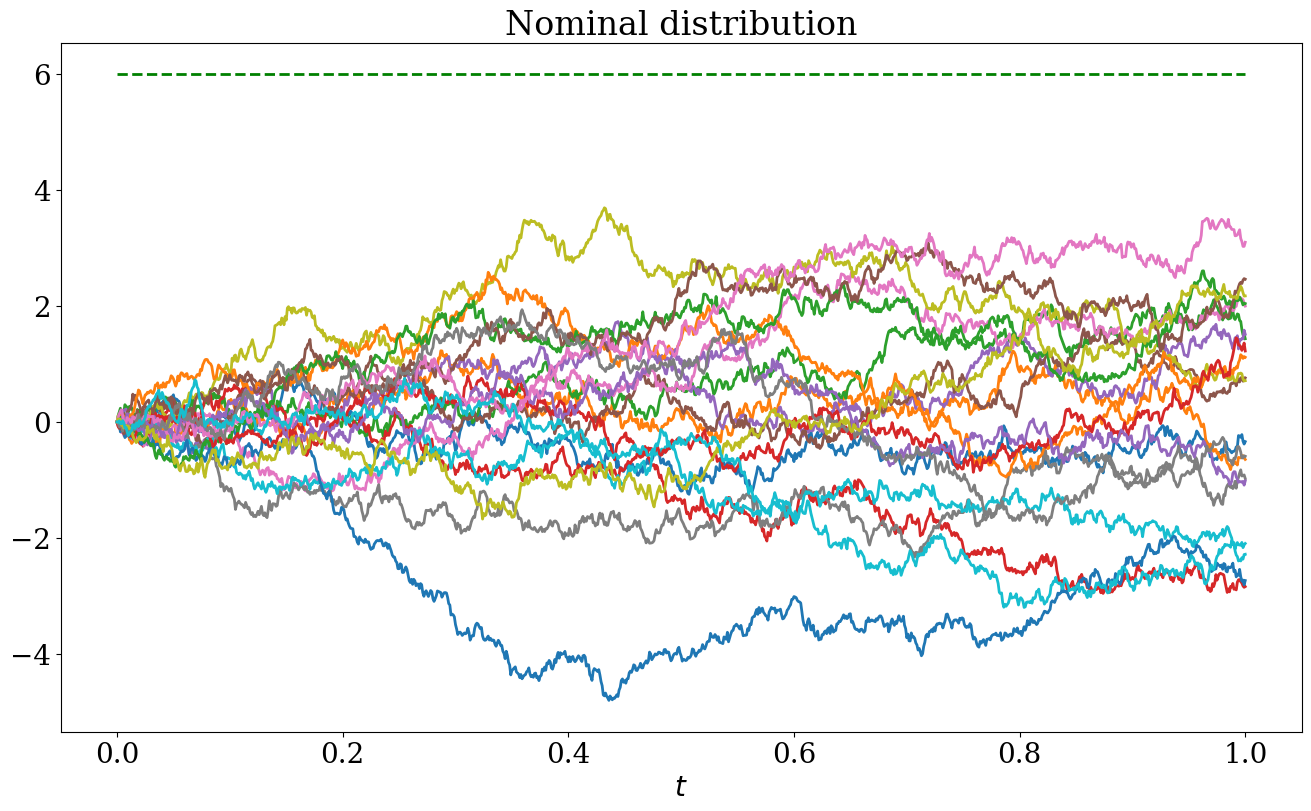

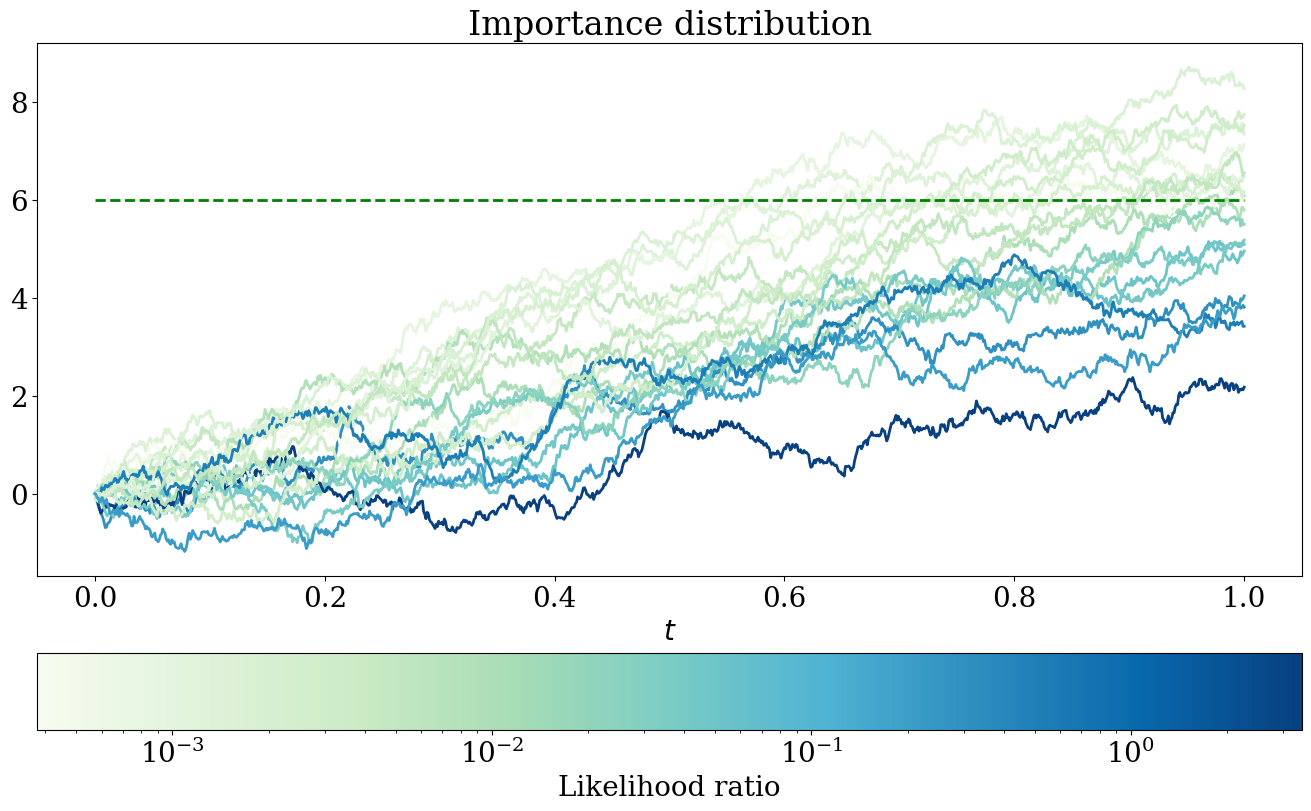

In [3]:
# Parameters
x0, T, sigma, K = 0, 1, 2, 6

# Exact value of probability
P = 2 * (1 - scipy.stats.norm.cdf((K - x0)/(sigma*np.sqrt(T))))

# Indicator functions of which we want to calculate the expectation
def f(x):
    return (np.max(x, axis=0) >= K)*1.

def importance_sampling(b_fun, m, N, plot=False, plot_title=None):
    # N is the number of discretization points and m is the number of samples.

    # Time and Brownian increments
    Δt = T/N
    Δw = np.sqrt(Δt) * np.random.randn(N, m)

    # Likelihood ratio
    def g(x):
        n_paths = x.shape[1]
        result = np.zeros(n_paths)
        for i in range(N):
            bi = b_fun(x[i, :])
            result += bi * (x[i + 1, :] - x[i, :]) - (1/2) * bi**2 * Δt
        return np.exp(-(1/sigma**2) * result)

    # We store the initial condition in x too (hence N + 1)
    x = np.zeros((N + 1, m))

    # Set initial condition
    x[0, :] = x0

    for j in range(N):
        x[j + 1] = x[j] + b_fun(x[j]) * Δt + sigma * Δw[j]

    # Evaluate target function and likelihood ratio
    fx, gx = f(x), g(x)

    estimator = np.mean(fx*gx)
    variance = np.var(fx*gx)

    if plot:
        n_samples = 20

        # Calculate colors
        colors = np.log10(gx[:n_samples])
        Max, Min = np.max(colors), np.min(colors)
        delta = Max - Min

        # Colormap
        cmap = matplotlib.colormaps['GnBu']
        colors = (colors - np.min(colors)) / delta if delta > 1e-8 else None

        # Figure
        fig = plt.figure(constrained_layout=True)
        gs = fig.add_gridspec(8, 1)

        if delta < 1e-8:
            ax_plot = fig.add_subplot(gs[:, :])
        else:
            ax_plot = fig.add_subplot(gs[:-1, :])
            ax_cb = fig.add_subplot(gs[-1, :])

        t = np.linspace(0, T, N + 1)
        for j in range(n_samples):
            color = cmap(colors[j]) if colors is not None else None
            ax_plot.plot(t, x[:, j], color=color)

        # 'ls' is 'linestyle' and 'c' = 'color'
        ax_plot.plot(t, K + np.zeros(N + 1), ls='--', c='g')
        ax_plot.set_xlabel("$t$")
        ax_plot.set_title(plot_title)

        # Add standalone colorbar
        if delta > 1e-8:
            norm = matplotlib.colors.LogNorm(vmin=10**Min, vmax=10**Max)
            # norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
            cb = matplotlib.colorbar.ColorbarBase(
                    ax_cb, cmap=cmap, norm=norm, orientation='horizontal')
            cb.set_label("Likelihood ratio")

        plt.show()

    return estimator, variance


def print_confidence(m, v):
    a = scipy.stats.norm.ppf(.975)
    print("95% confidence interval for P: [{:0.6f}, {:0.6f}]"
            .format(m - a*np.sqrt(v), m + a*np.sqrt(v)))

# Number of samples
m = 10**4

# Default parameter
b = K/T

# Print exact value
print("Exact value of the probability: {0:0.06f}".format(P))

def estimate(N):
    # Without importance sampling
    mean, var = importance_sampling(b_fun=lambda x: 0, m=m, N=N)
    print_confidence(mean, var/m)

    # With importance sampling
    mean_im, var = importance_sampling(b_fun=lambda x: (x < K)*b, m=m, N=N)
    print_confidence(mean_im, var/m)

# Here the error induced by the fact that we are calculating the supremum based
# on only a finite number of discretization points dominates.
estimate(10)
# -

# +
# To obtain a better estimate, we reduce the time step
estimate(10**2)
# -

# +
# We obtain an even better estimate by further reducing the time step
estimate(10**3)
# -

# +
# Plot trajectories from nominal and importance distributions
mean, var = importance_sampling(b_fun=lambda x: 0, m=m, N=10**3, plot=True,
                                plot_title="Nominal distribution")
mean_im, var = importance_sampling(b_fun=lambda x: (x < K)*b, m=m, N=10**3, plot=True,
                                   plot_title="Importance distribution")